## Monte Carlo Simulation

In [1]:
import numpy as np
import pandas 

df = pandas.read_csv("https://raw.githubusercontent.com/ChristopheHunt/MSDA"+ 
                     "---Coursework/master/Data%20602/Data%20602%20-%20" + 
                     "Advanced%20Programming/Week%2011/apple.2011.csv")

df.columns = [ 'Date', 'Last', 'Change']

> The file (apple.2011.csv) has 3 columns: date, price, and percent change.  The information you are really interested in is the percent change.  This value is the percent change in the price from the previous date to the date on the corresponding row.

In [2]:
df['Change'] = pandas.to_numeric(df['Change'], errors='coerce')
df.head(10)

,Date,Last,Change
0,1/3/2011,329.570,NaN
1,1/4/2011,331.290,0.005219
2,1/5/2011,334.000,0.008180
3,1/6/2011,333.730,-0.000808
4,1/7/2011,336.120,0.007161
5,1/10/2011,342.455,0.018847
6,1/11/2011,341.640,-0.002380
7,1/12/2011,344.420,0.008137
8,1/13/2011,345.680,0.003658
9,1/14/2011,348.480,0.008100


> Use the percent change values to create a Gaussian random number generator.  This generator will create Gaussian-distributed randoms to use as hypothetical percent changes on the day to day price of Apple stock.

In [3]:
mu, sigma = df['Change'].mean(), df['Change'].std()
random_numbers = np.random.normal(mu, sigma, 20)

>With that generator, create 20 random numbers.  With these randoms, you can find a potential price change over 20 days.

In [4]:
random_numbers

array([-0.00826575,  0.01507182, -0.01200947,  0.03247669,  0.01704239,
        0.01206027,  0.01864534, -0.01325057,  0.00993179, -0.01295448,
        0.00896616,  0.00127762,  0.00786148,  0.00038866,  0.01354714,
        0.02089059,  0.0127606 , -0.01395651,  0.0284708 , -0.00866915])

> Start with the price from the last row and the random numbers to determine a hypothetical price after 20 days.  To do this, take that last price, apply a percent change and get a new price.  Then take that new price, and apply the next percent change.  Do this for the 20 randoms, and get a final price. 

In [5]:
last_price = df['Last'].tail(1)
last_price = last_price.iloc[0]
for i in random_numbers:
    last_price =  (i * last_price) + last_price 

> Store the final price after 20 days (you can discard the intermediate price values).

In [6]:
new_last_price = last_price
new_last_price

460.27989867359827

> Repeat steps 3-5 a very large number of times.  Something like 10000.  Each run will yield a different result.

In [7]:
def VaR(n, days):
    import pandas
    list_values = []
    mu, sigma = df['Change'].mean(), df['Change'].std()
    for j in range(1,n):
        random_numbers = np.random.normal(mu, sigma, days)
        last_price = df['Last'].tail(1)
        last_price = last_price.iloc[0]
        for i in random_numbers:
            last_price =  (i * last_price) + last_price 
        list_values.append(last_price)
    df_new = pandas.DataFrame(list_values)
    df_new.columns = ['Value']
    return(df_new)

> Take all of the stored prices (10000 or so), sort them, and find the 1% lowest percentile.  This value is the final result, and represents the VaR with 99% confidence.  This means that the price will be above this result after 20 days with a confidence level of 99%.

In [8]:
days = 20
VaR_df = VaR(100000, days)
lowest = VaR_df.quantile(q = .01).iloc[0]

In [9]:
print("The stock price should be above $%s after %s days with a confidence level of 99%%" % (round(lowest,2), days)) 

The stock price should be above $345.94 after 20 days with a confidence level of 99%


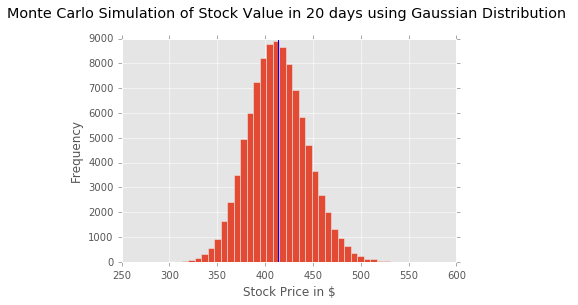

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
matplotlib.style.use('ggplot')

plt.hist(VaR_df['Value'],40)
plt.axvline(x= VaR_df['Value'].mean())
plt.title("Monte Carlo Simulation of Stock Value in 20 days using Gaussian Distribution \n")
plt.xlabel("Stock Price in $")
plt.ylabel("Frequency")
plt.show()